In [ ]:
import functools
%run boaz_utils.ipynb

# More Sorting

In [ ]:
L = [4,1,3,2]
print(sorted(L))

[1, 2, 3, 4]


In [ ]:
def make_comparator(key):
    def compare(x,y):
        if x[key] < y[key]:
            return -1
        elif x[key] > y[key]:
            return 1
        else:
            return 0
    return compare

In [ ]:
runners = [
    {'firstname':'Shelly-Ann', 'lastname':'Fraser-Pryce', 'country':'JAM', 'time':10.67},
    {'firstname':'Shericka', 'lastname':'Jackson', 'country':'JAM', 'time':10.73},
    {'firstname':'Elaine', 'lastname':'Thompson-Herah', 'country':'JAM', 'time':10.81},
    {'firstname':'Dina', 'lastname':'Asher-Smith', 'country':'GBR', 'time':10.83},
    {'firstname':'Mujinga', 'lastname':'Kambundji', 'country':'SUI', 'time':10.91},
    {'firstname':'Aleia', 'lastname':'Hobbs', 'country':'USA', 'time':10.92},
    {'firstname':'Marie Josée', 'lastname':'Ta Lou', 'country':'CIV', 'time':10.93},
    {'firstname':'Melissa', 'lastname':'Jefferson', 'country':'USA', 'time':11.03},

]

In [ ]:
def print_runners(L):
    for x in L:
        print(x['firstname'].ljust(15) + ' ' + (x['lastname'].upper() + ',').ljust(20) + ' ' + x['country'].ljust(3) + ', ' + str(x['time']))

In [ ]:
print_runners(sorted(runners, key=functools.cmp_to_key(make_comparator('time'))))

Shelly-Ann      FRASER-PRYCE,        JAM, 10.67
Shericka        JACKSON,             JAM, 10.73
Elaine          THOMPSON-HERAH,      JAM, 10.81
Dina            ASHER-SMITH,         GBR, 10.83
Mujinga         KAMBUNDJI,           SUI, 10.91
Aleia           HOBBS,               USA, 10.92
Marie Josée     TA LOU,              CIV, 10.93
Melissa         JEFFERSON,           USA, 11.03


**What is a good way to sort?**

**Simple algorithm**: find smallest item and move to position 0, then the next smallest to position 1, etc...

## Recursive implementation

In [ ]:
# return the index of the minimum element of the list
def find_min_index(L):
    if len(L) == 0: # hmmm...
        return -1
    elif len(L) == 1:
        return 0
    else:
        i = find_min_index(L[1:]) + 1
        if L[i] < L[0]:
            return i
        else:
            return 0

In [ ]:
print(find_min_index([5,6,7]))

print(find_min_index([6,5,8]))

print(find_min_index([6,7,5]))

0
1
2


In [ ]:
def selection_sort(L):
    if len(L) == 0:
        return L[:] # why do we return L[:] instead of L?
    else:
        idx = find_min_index(L)
        return [L[idx]] + selection_sort(L[:idx] + L[idx+1:])

In [ ]:
selection_sort([5,4,3,2,1])

[1, 2, 3, 4, 5]

## Iterative implementation

In [ ]:
def iterative_selection_sort(L):
    A = L[:]
    for i in range(len(A)):
        # try to find index idx of the min element in L[i:],
        # then move it to L[i]
        idx = i
        for j in range(i+1, len(A)):
            if A[j] < A[idx]:
                idx = j
        
        # swap contents of A[i] and A[idx]
        tmp = A[i]
        A[i] = A[idx]
        A[idx] = tmp
    return A

In [ ]:
L = [3,2,1]
iterative_selection_sort(L)

[1, 2, 3]

## Roughly how many steps do these algorithms take?

### Recursive implementation
Let $T(n)$ be the number of steps the algorithm takes on input lists of length $n$.

Then

$$
T(n) = \begin{cases} 1, & \text{if } \text{len(L)}==0\\ T(n-1) + Cn, & \text{otherwise}\end{cases}
$$

### So then $\ldots$

$T(n) = T(n-1) + Cn$

$T(n) = T(n-2) + Cn + C(n-1)$

$T(n) = T(n-3) + Cn + C(n-1) + C(n-2)$

$$\ldots$$

$T(n) \le C(n + n-1 + n-2 + \ldots + 1)$

same thing as saying

$T(n) \le C(1 + 2 + \ldots + n)$



Also

$$T(n) \ge 1+2+\ldots + n$$


## Have you seen this sum before?

$$\begin{align*}
1+2+\ldots+n &= (1+n) + (2+(n-1)) + (3+(n-2))+ \ldots\\
{}&= (n+1) + (n+1) + (n+1) + \ldots
\end{align*}
$$

which is
$$
\begin{cases}
(n+1)\cdot\frac n2, & \text{if } n\text{ is even}\\
(n+1)\cdot\frac{n-1}2 + \frac{n+1}2, & \text{if } n\text{ is odd}
\end{cases}
$$

(and you can check that $(n+1)\cdot\frac{n-1}2 + \frac{n+1}2 = (n+1)\cdot\frac n2$)

In any case, the sum is $\approx \frac{n^2}2$, so we say the runtime is "proportional to $n^2$" (some constant factor times $n^2$), which we also write as "$\Theta(n^2)$".

# Some computer science jargon $\ldots$

Say $f(n)$ is the worst-case runtime of some algorithm on inputs of size $n$

and $g(n)$ is the worst-case runtime of some other algorithm on inputs of size $n$


Then the notation means that once $n$ is larger than some threshold $\ldots$

**$f(n) = O(g(n))$**: $f(n) \le C g(n)$ for some constant $C$

**$f(n) = \Omega(g(n))$**: $f(n) \ge C g(n)$ for some constant $C$

**$f(n) = \Theta(g(n))$**: $f(n) = O(g(n))$ and $f(n) = \Omega(g(n))$ 

$n = O(3n)$ and $n = O(7n^2 + 2n + \cos(n))$, but $n$ is not $\Theta(7n^2)$ (because it is not $\Omega(7n^2)$)

## Back to selection_sort

Easier way to see that $1+2+\ldots + n = \Theta(n^2)$ $\ldots$

\begin{align*}
1 + 2 + \ldots + n &\le n\cdot n = n^2\\
1 + 2 + \ldots + n &\ge  \frac n2 +  \left(\frac n2 + 1\right) + \ldots + n \approx \frac{n^2}2
\end{align*}

So running time of the algorithm is at least $\frac{n^2}2$ and at most $n^2$, so it is $\Theta(n^2)$

/home/minilek/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


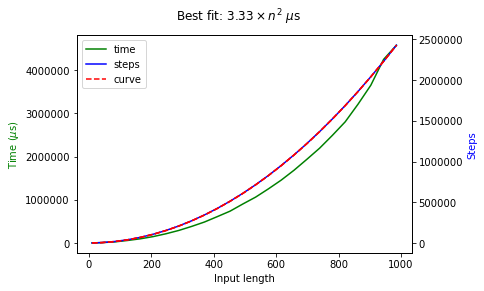

In [ ]:
c , *_ = timer(selection_sort,genintlist(1000))

In [ ]:
c(10**9)

3333229102056.811

In [ ]:
print(f'{int(c(10**9)/ (24*3600*365)):,} years!') 

105,696 years!


# Can we sort faster?

In [ ]:
def merge(A, B):
    C = []
    Aidx,Bidx = 0,0
    for i in range(len(A) + len(B)):
        if Aidx == len(A):
            C += B[Bidx:]
            break
        elif Bidx == len(B):
            C += A[Aidx:]
            break
        elif A[Aidx] < B[Bidx]:
            C += [A[Aidx]]
            Aidx += 1
        else:
            C += [B[Bidx]]
            Bidx += 1
    return C
        

def merge_sort(L):
    if len(L) <= 1:
        return L[:]
    else:
        A = merge_sort(L[:len(L)//2])
        B = merge_sort(L[len(L)//2:])
        return merge(A,B)

In [ ]:
# can also use a recursive implementation of merge
def recursive_merge(A, B):
    if len(A) == 0:
        return B[:]
    elif len(B) == 0:
        return A[:]
    elif A[0] < B[0]:
        return [A[0]] + merge(A[1:], B)
    else:
        return [B[0]] + merge(A, B[1:])

In [ ]:
merge_sort([5,4,3,2,1])

[1, 2, 3, 4, 5]

In [ ]:
print(list(range(10,0,-1)))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [ ]:
big_list = list(range(20000,0,-1))

In [ ]:
merge_sort(big_list)
'done'

'done'

In [ ]:
iterative_repeated_min_sort(big_list)
'done'

'done'

# Now let's analyze the running time of MergeSort on the board ...

/home/minilek/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


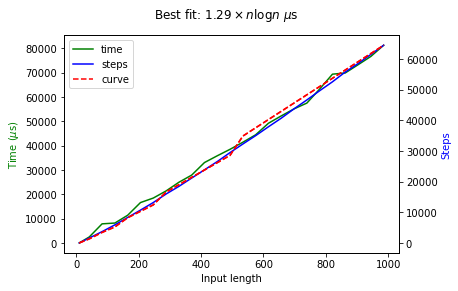

In [ ]:
c , *_ = timer(merge_sort,genintlist(1000))

In [ ]:
c(10**9)

37506.54340083344

In [ ]:
print(f'{int(c(10**9)/ 3600):,} hours!') 

10 hours!
